# Tutorial 4: Computing entropy

Entropy is a measure of disorder/uncertainty/complexity. It can be computed precisely from a probability distribution. Given data, we can obtain an approximation using several different measures. 

*ewstools* currently supports
- sample entropy
- approximate entropy
- kolmogorov entropy

Entropy is expected to **decrease** prior to a bifurcation.

*ewstools* makes use of the Python package [EntropyHub](https://www.entropyhub.xyz/index.html), where lots more information on entropy is available, including other measures.

By the end of this tutorial you should know how to:
- Compute entropy measures as an early warning signal for a bifurcation

Notebook run time : XX s on Macbook Air (M1, 2020)


## Import libraries


In [1]:
# Start timer to record execution time of notebook
import time
start_time = time.time()

In [2]:
import numpy as np
np.random.seed(0) # Set seed for reproducibility
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image

import ewstools
from ewstools.models import simulate_ricker

## Simulate a model
Let's simulate the Ricker model to give us some data on which to compute entropy


In [3]:
series = simulate_ricker(tmax=1000, F=[0,2.7])

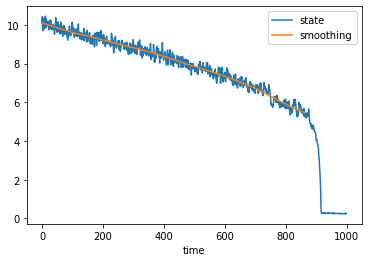

In [4]:
# Detrend the data
ts = ewstools.TimeSeries(data=series, transition=860)
ts.detrend(method='Lowess', span=0.2)
ts.state[['state','smoothing']].plot();

## Compute sample entropy

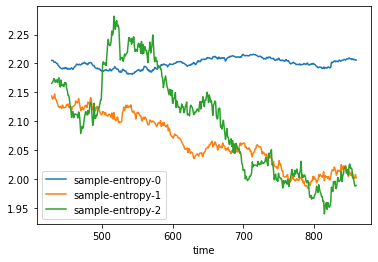

In [5]:
ts.compute_entropy(rolling_window=0.5, method='sample')
ts.ews.plot();

## Compute approximate entropy

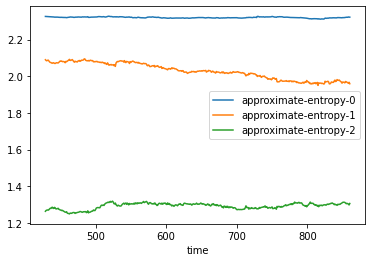

In [8]:
ts.ews.drop(ts.ews.columns, inplace=True, axis=1)
ts.compute_entropy(rolling_window=0.5, method='approximate')
ts.ews.plot();

## Compute Kolmogorov entropy

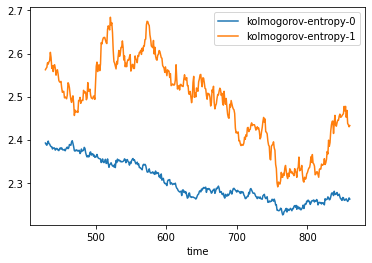

In [9]:
ts.ews.drop(ts.ews.columns, inplace=True, axis=1)
ts.compute_entropy(rolling_window=0.5, method='kolmogorov')
ts.ews.plot();

## Using keyword arguments from Entropy Hub

The Entropy Hub [API](https://www.entropyhub.xyz/python/Functions/Base.html) contains functions to compute entropy. The keyword arguments to these functions can be passed to ```compute_entropy()```. For example we can modify the embedding dimension ```m``` and the time delay ```tau``` that are arguments to the [K2En](https://www.entropyhub.xyz/python/Functions/Base.html#EntropyHub.K2En) function.

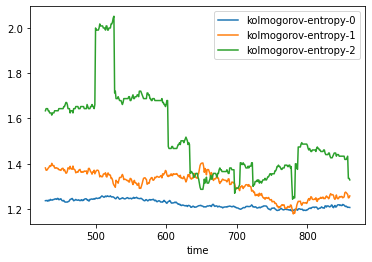

In [10]:
ts.ews.drop(ts.ews.columns, inplace=True, axis=1)
ts.compute_entropy(rolling_window=0.5, method='kolmogorov', m=3, tau=2)
ts.ews.plot();

In [11]:
# Stop timer
end_time = time.time()
print('Notebook took {:.1f}s to run'.format(end_time-start_time))

Notebook took 23.4s to run
